In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wim_dateTime import createListDateTime
from datetime import datetime, timedelta
import argparse
import subprocess
import warnings
import netCDF4 as nc
import numpy.ma as ma
import os
import xarray as xr
import matplotlib
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.basemap import Basemap
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator

In [16]:
REP_noWRS='/aos/home/bward/wim/post-proc/case84/avg/'
REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
REP_noCoup='/aos/home/bward/wim/post-proc/case85/avg/'

file_area='/aos/home/bward/wim/cice/out/case74/history/iceh_ic.2005-01-09-43200.nc'
dx_area = xr.open_dataset(file_area)
dx_area= dx_area.tarea

yyyy=2018
list_month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
monthsl=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


i=0
j=1

ts_dyn=[]
ts_dyn2=[]
ts_therm=[]
ts_tot=[]
ts_tot2=[]
ts_therm2=[]
for mm in list_month:
    if i < 11:
        nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy)+list_month[j]+'0100000.nc'
    else:
        nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy+1)+list_month[0]+'0100000.nc'
    pathFile_noWRS=REP_noWRS+nameFile
    pathFile_coup=REP_coup+nameFile
    pathFile_noCoup=REP_noCoup+nameFile
    pathFile_test=REP_test+nameFile
    pathFile_test2=REP_test2+nameFile

    dx_noWRS = xr.open_dataset(pathFile_noWRS)
    dx_coup = xr.open_dataset(pathFile_coup)
    dx_noCoup = xr.open_dataset(pathFile_noCoup)
    dx_test = xr.open_dataset(pathFile_test)
    dx_test2 = xr.open_dataset(pathFile_test2)

    aice=np.squeeze(dx_coup.aice)
    lat=dx_coup.TLAT
    lon=dx_coup.TLON

    maskLab=aice.where(np.logical_and(np.logical_and(lat>=45, lat<=72), np.logical_and(lon>=360-65, lon<=360-43)))
    maskcMIZ=aice.where(np.logical_and(aice>=0.15, aice<=0.8))

    da_dyn=np.squeeze(dx_coup.aice.where(np.logical_and(maskLab>0, maskcMIZ>0))-dx_noWRS.aice.where(np.logical_and(maskLab>0, maskcMIZ>0)))*dx_area/1e6    
    da_tot=np.squeeze(dx_coup.aice.where(np.logical_and(maskLab>0, maskcMIZ>0))-dx_noCoup.aice.where(np.logical_and(maskLab>0, maskcMIZ>0)))*dx_area/1e6
    da_therm=np.squeeze(dx_noWRS.aice.where(np.logical_and(maskLab>0, maskcMIZ>0))-dx_noCoup.aice.where(np.logical_and(maskLab>0, maskcMIZ>0)))*dx_area/1e6

#         test=np.squeeze(dx_coup.dafsd_wave[:,0,:,:])
#         test=test.where(maskNH>0)

#         dataX=dx_coup.strwvx
#         dataY=dx_coup.strwvy
#         strwv=np.sqrt(dataX**2+dataY**2)
#         dataX=dx_coup.strairx
#         dataY=dx_coup.strairy
#         strair=np.sqrt(dataX**2+dataY**2)
#         data=strwv.where(maskNH>0)/(strair.where(maskNH>0)+strwv.where(maskNH>0))


    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        ts_dyn.append(np.nanmean(np.nanmean(da_dyn.where(maskMIZ>0), axis=0)))
        ts_therm.append(np.nanmean(np.nanmean(da_therm.where(maskMIZ>0), axis=0)))
        ts_tot.append(np.nanmean(np.nanmean(da_tot.where(maskMIZ>0), axis=0)))

    i=i+1
    j=j+1

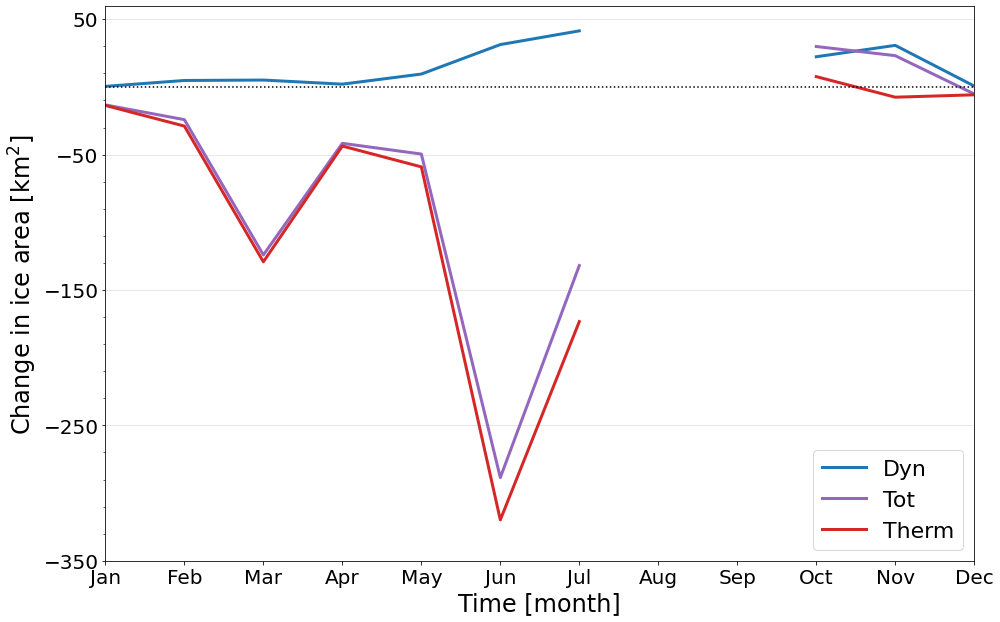

In [20]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,1,figsize=[14,8.75])
# # Plot
plt.sca(axes) 
axes.plot(monthsl, ts_dyn, 'tab:blue',label='Dyn', linewidth=3)
axes.plot(monthsl, ts_tot, 'tab:purple',label='Tot',linewidth=3)
axes.plot(monthsl, ts_therm, 'tab:red',label='Therm',linewidth=3)
axes.axhline(y = 0, color = 'k', linestyle = ':')
axes.set_xticks(monthsl[0:len(monthsl)])
axes.set_xlim([monthsl[0],monthsl[-1]])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
axes.yaxis.set_ticks(axes.get_yticks()[::2])
axes.yaxis.set_minor_locator(ticker.AutoMinorLocator())
leg=axes.legend(loc='lower right', prop={'size': 22})
axes.set_ylabel(r'Change in ice area [km$^2$]', size=24)
axes.set_xlabel(r'Time [month]', size=24)
axes.set_xlim([monthsl[0],monthsl[-1]])
# axes.grid(which="major", axis='x', color='#DAD8D7', alpha=0.75, zorder=-1)
axes.grid(which="major", axis='y', color='#DAD8D7', alpha=0.75, zorder=-1)

plt.tight_layout()
#     # fig.savefig("test", bbbox_to_anchor='tight', dpi=500)
fig.savefig('ts_dyn_thermo_tot_MIZ_aice_labrador.png', dpi='figure', format='png', metadata=None,bbox_inches='tight')
    

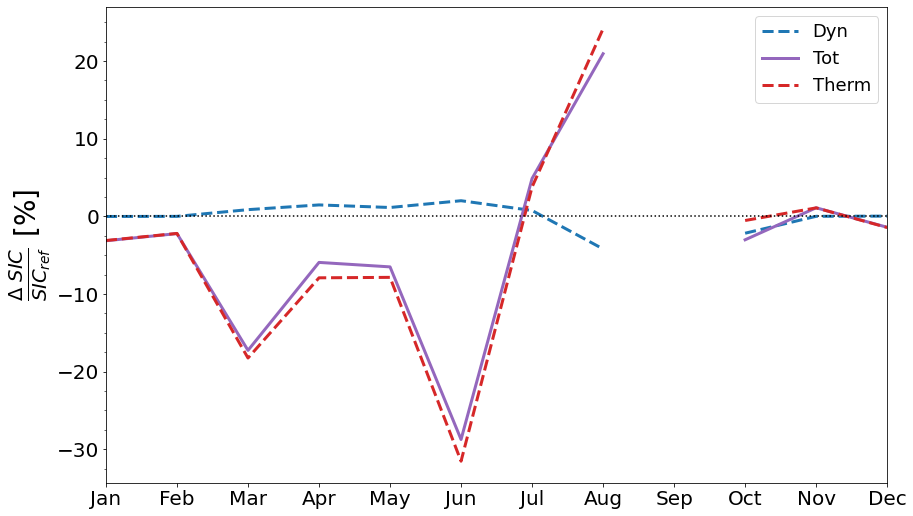

In [7]:
def main():
    REP_noWRS='/aos/home/bward/wim/post-proc/case84/avg/'
    REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
    REP_noCoup='/aos/home/bward/wim/post-proc/case85/avg/'
    REP_test='/aos/home/bward/wim/post-proc/case86/avg/'
    REP_test2='/aos/home/bward/wim/post-proc/case87/avg/'
    
    yyyy=2018
    list_month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    monthsl=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    
    i=0
    j=1
    
    ts_dyn=[]
    ts_dyn2=[]
    ts_therm=[]
    ts_tot=[]
    ts_tot2=[]
    ts_therm2=[]
    fig, axes = plt.subplots(1,1,figsize=[14,8.75])
    for mm in list_month:
        if i < 11:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy)+list_month[j]+'0100000.nc'
        else:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy+1)+list_month[0]+'0100000.nc'
        pathFile_noWRS=REP_noWRS+nameFile
        pathFile_coup=REP_coup+nameFile
        pathFile_noCoup=REP_noCoup+nameFile
        pathFile_test=REP_test+nameFile
        pathFile_test2=REP_test2+nameFile
        
        dx_noWRS = xr.open_dataset(pathFile_noWRS)
        dx_coup = xr.open_dataset(pathFile_coup)
        dx_noCoup = xr.open_dataset(pathFile_noCoup)
        dx_test = xr.open_dataset(pathFile_test)
        dx_test2 = xr.open_dataset(pathFile_test2)
        
        aice=np.squeeze(dx_coup.aice)
        lat=dx_coup.TLAT
        lon=dx_coup.TLON
        
        maskNH=aice.where(lat>=45)
        maskNH=maskNH.where(lat<=72)
        maskNH=maskNH.where(lon>=360-65)
        maskNH=maskNH.where(lon<=360-45)
        maskMIZ=maskNH.where(maskNH >=0.15)
        maskMIZ=maskMIZ.where(maskMIZ<=0.8)
        
        da_dyn=np.squeeze(dx_coup.aice.where(maskMIZ>0)-dx_noWRS.aice.where(maskMIZ>0))/dx_coup.aice.where(maskMIZ>0)*100
        da_dyn2=np.squeeze(dx_test.aice-dx_test2.aice)
        da_dyn_test=np.squeeze(dx_coup.aice.where(maskMIZ>0)-dx_noWRS.aice.where(maskMIZ>0))
        da_tot=np.squeeze(dx_coup.aice.where(maskMIZ>0)-dx_noCoup.aice.where(maskMIZ>0))/dx_coup.aice.where(maskMIZ>0)*100
        da_therm=np.squeeze(dx_noWRS.aice.where(maskMIZ>0)-dx_noCoup.aice.where(maskMIZ>0))/dx_noWRS.aice.where(maskMIZ>0)*100
        da_tot2=np.squeeze(dx_test.aice-dx_noCoup.aice)
        da_therm2=np.squeeze(dx_test2.aice-dx_noCoup.aice)
        
#         test=np.squeeze(dx_coup.dafsd_wave[:,0,:,:])
#         test=test.where(maskNH>0)
        
#         dataX=dx_coup.strwvx
#         dataY=dx_coup.strwvy
#         strwv=np.sqrt(dataX**2+dataY**2)
#         dataX=dx_coup.strairx
#         dataY=dx_coup.strairy
#         strair=np.sqrt(dataX**2+dataY**2)
#         data=strwv.where(maskNH>0)/(strair.where(maskNH>0)+strwv.where(maskNH>0))
    
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            ts_dyn.append(np.nanmean(np.nanmean(da_dyn.where(maskMIZ>0), axis=0)))
            ts_dyn2.append(np.nanmean(np.nanmean(da_dyn2.where(maskMIZ>0), axis=0)))
            ts_therm.append(np.nanmean(np.nanmean(da_therm.where(maskMIZ>0), axis=0)))
            ts_tot.append(np.nanmean(np.nanmean(da_tot.where(maskMIZ>0), axis=0)))
            ts_therm2.append(np.nanmean(np.nanmean(da_therm2.where(maskMIZ>0), axis=0)))
            ts_tot2.append(np.nanmean(np.nanmean(da_tot2.where(maskMIZ>0), axis=0)))
    
        i=i+1
        j=j+1
        

#     m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
#     ax3=axes[0].twinx()
    axes.plot(monthsl, ts_dyn, 'tab:blue',label='Dyn', linewidth=3,linestyle='--')
#     axes[0].plot(list_month, ts_dyn2, 'b', linestyle='--', label='IC2IS2')
#     ax3.legend(loc='upper right', prop={'size': 16})
#     ax3.spines['right'].set_color('blue')
#     ax3.set_ylabel("da dyn", size=16)
#     ax3.yaxis.label.set_color('blue')
#     ax3.axhline(y = 0, color = 'b', linestyle = ':')
#     ax3.tick_params(axis='y', colors='blue')
    axes.plot(monthsl, ts_tot, 'tab:purple',label='Tot',linewidth=3)
    axes.plot(monthsl, ts_therm, 'tab:red',label='Therm',linewidth=3, linestyle='--')
#     axes[0].plot(list_month, ts_tot2, 'k', linestyle = '--', label='Tot IC2IS2')
#     axes[0].plot(list_month, ts_therm2, 'r', linestyle = '--', label='Therm IS2IS2')
    axes.set_xlim([monthsl[0],monthsl[-1]])
    axes.axhline(y = 0, color = 'k', linestyle = ':')
    axes.set_xticks(monthsl[0:len(monthsl)])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    axes.legend(loc='upper right', prop={'size': 18})
    axes.yaxis.set_minor_locator(AutoMinorLocator(4))
    axes.set_ylabel(r'$\frac{\Delta \ SIC}{SIC_{ref}}$ [%]', size=28)

    fig.savefig('ts_dyn_thermo_tot_MIZ_aice_labrador.png', dpi='figure', format='png', metadata=None,bbox_inches='tight')
    
# #Call main
if __name__ == "__main__":
    main()

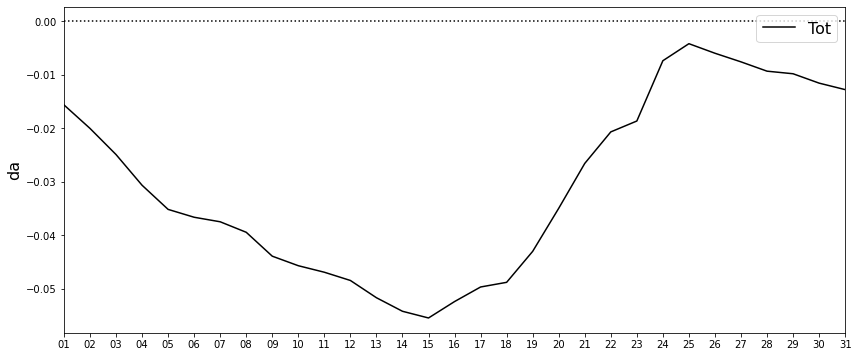

In [18]:
def main():
    REP_noWRS='/aos/home/bward/wim/post-proc/case84/avg/'
    REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
    REP_noCoup='/aos/home/bward/wim/post-proc/case85/avg/'
    REP_test='/aos/home/bward/wim/post-proc/case86/avg/'
    REP_test2='/aos/home/bward/wim/post-proc/case87/avg/'
    
    yyyy=2018
    month='03'
    list_month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16','17','18','19','20','21','22','23','24', '25', '26', '27', '28', '29', '30', '31']
    
    i=0
    j=1
    
    ts_dyn=[]
    ts_dyn2=[]
    ts_therm=[]
    ts_tot=[]
    ts_tot2=[]
    ts_therm2=[]
    fig, axes = plt.subplots(1,1,figsize=[14,6])
    
    for mm in list_month:
        if i < 30:
            nameFile='iceh_avg.'+str(yyyy)+month+list_month[i]+'00000-'+str(yyyy)+month+list_month[j]+'00000.nc'
        else:

            nameFile='iceh_avg.'+str(yyyy)+'033100000-'+str(yyyy)+'040100000.nc'
            
        pathFile_noWRS=REP_noWRS+nameFile
        pathFile_coup=REP_coup+nameFile
        pathFile_noCoup=REP_noCoup+nameFile
        pathFile_test=REP_test+nameFile
        pathFile_test2=REP_test2+nameFile
        
#         dx_noWRS = xr.open_dataset(pathFile_noWRS)
        dx_coup = xr.open_dataset(pathFile_coup)
        dx_noCoup = xr.open_dataset(pathFile_noCoup)
#         dx_test = xr.open_dataset(pathFile_test)
#         dx_test2 = xr.open_dataset(pathFile_test2)
        
        aice=np.squeeze(dx_coup.aice)
        lat=dx_coup.TLAT
        lon=dx_coup.TLON
        maskNH=aice.where(lat>=48)
        maskNH=maskNH.where(lat<=60)
        maskNH=maskNH.where(lon>=298)
        maskNH=maskNH.where(lon<=316)
        
#         da_dyn=np.squeeze(dx_coup.aice-dx_noWRS.aice)
#         da_dyn2=np.squeeze(dx_test.aice-dx_test2.aice)
#         da_dyn_test=np.squeeze(dx_coup.aice-dx_noWRS.aice)
        da_tot=np.squeeze(dx_coup.aice-dx_noCoup.aice)

#         da_therm=np.squeeze(dx_noWRS.aice-dx_noCoup.aice)
#         da_tot2=np.squeeze(dx_test.aice-dx_noCoup.aice)
#         da_therm2=np.squeeze(dx_test2.aice-dx_noCoup.aice)
        
#         test=np.squeeze(dx_coup.dafsd_wave[:,0,:,:])
#         test=test.where(maskNH>0)
        
        dataX=dx_coup.strwvx
        dataY=dx_coup.strwvy
        strwv=np.sqrt(dataX**2+dataY**2)
        dataX=dx_coup.strairx
        dataY=dx_coup.strairy
        strair=np.sqrt(dataX**2+dataY**2)
        data=strwv.where(maskNH>0)/(strair.where(maskNH>0)+strwv.where(maskNH>0))
        maskMIZ=maskNH.where(maskNH>0)
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
#             ts_dyn.append(np.nanmean(np.nanmean(da_dyn.where(maskMIZ>0), axis=0)))
#             ts_dyn2.append(np.nanmean(np.nanmean(da_dyn2.where(maskMIZ>0), axis=0)))
#             ts_therm.append(np.nanmean(np.nanmean(da_therm.where(maskMIZ>0), axis=0)))
            ts_tot.append(np.nanmean(np.nanmean(da_tot.where(maskMIZ>0), axis=0)))
#             ts_therm2.append(np.nanmean(np.nanmean(da_therm2.where(maskMIZ>0), axis=0)))
#             ts_tot2.append(np.nanmean(np.nanmean(da_tot2.where(maskMIZ>0), axis=0)))
    
        i=i+1
        j=j+1
        

    m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
#     ax3=axes[0].twinx()
#     axes.plot(list_month, ts_dyn, 'b',label='Dyn')
#     axes[0].plot(list_month, ts_dyn2, 'b', linestyle='--', label='IC2IS2')
#     ax3.legend(loc='upper right', prop={'size': 16})
#     ax3.spines['right'].set_color('blue')
#     ax3.set_ylabel("da dyn", size=16)
# #     ax3.yaxis.label.set_color('blue')
#     ax3.axhline(y = 0, color = 'b', linestyle = ':')
#     ax3.tick_params(axis='y', colors='blue')

    axes.plot(list_month, ts_tot, 'k',label='Tot')
#     axes.plot(list_month, ts_therm, 'r',label='Therm')
#     axes[0].plot(list_month, ts_tot2, 'k', linestyle = '--', label='Tot IC2IS2')
#     axes[0].plot(list_month, ts_therm2, 'r', linestyle = '--', label='Therm IS2IS2')
    axes.legend(loc='upper right', prop={'size': 16})
    axes.set_ylabel("da", size=16)
    axes.set_xlim([list_month[0],list_month[-1]])
    axes.axhline(y = 0, color = 'k', linestyle = ':')

# thermo_tot_MIZ_labrador.png', dpi='figure', format='png', metadata=None,bbox_inches='tight')
    
# #Call main
if __name__ == "__main__":
    main()

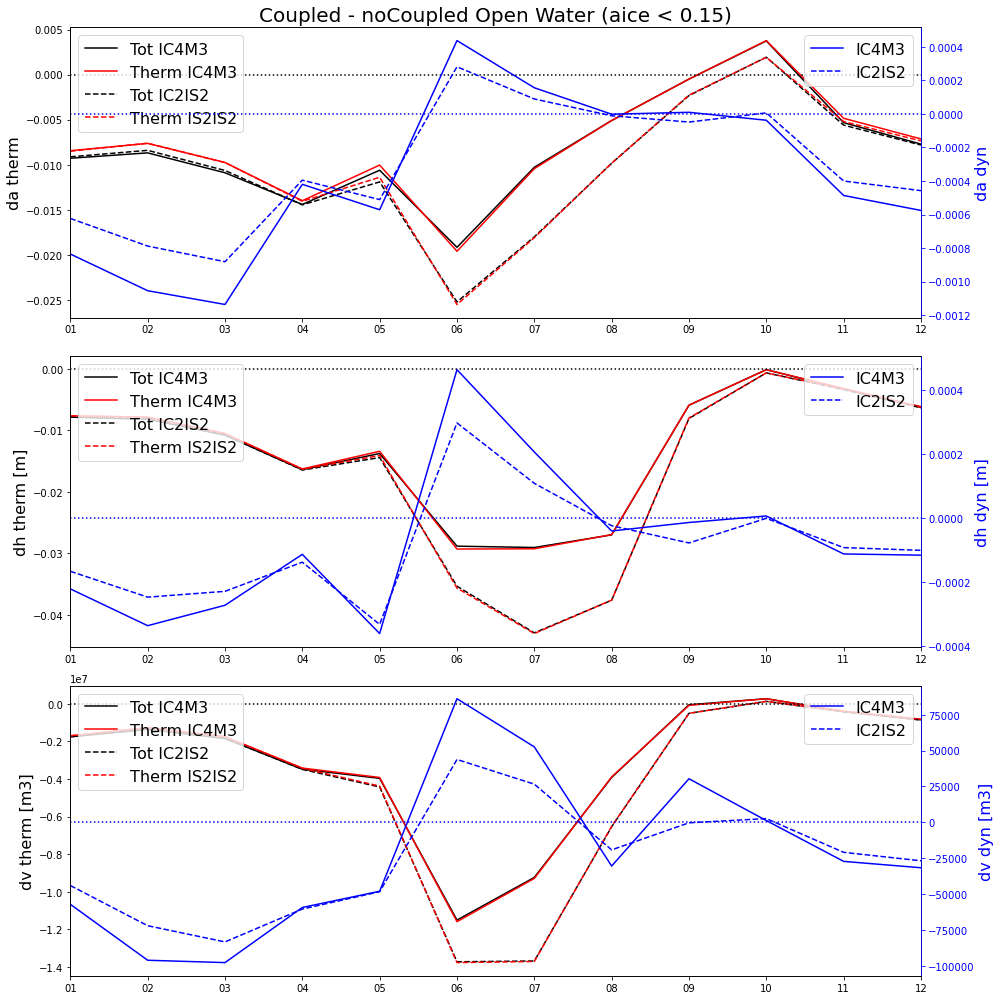

In [14]:
def main():
    REP_noWRS='/aos/home/bward/wim/post-proc/case84/avg/'
    REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
    REP_noCoup='/aos/home/bward/wim/post-proc/case85/avg/'
    REP_test='/aos/home/bward/wim/post-proc/case86/avg/'
    REP_test2='/aos/home/bward/wim/post-proc/case87/avg/'
    
    yyyy=2018
    list_month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    
    i=0
    j=1
    
    ts_dyn=[]
    ts_dyn2=[]
    ts_therm=[]
    ts_tot=[]
    ts_tot2=[]
    ts_therm2=[]
    for mm in list_month:
        if i < 11:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy)+list_month[j]+'0100000.nc'
        else:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy+1)+list_month[0]+'0100000.nc'
        pathFile_noWRS=REP_noWRS+nameFile
        pathFile_coup=REP_coup+nameFile
        pathFile_noCoup=REP_noCoup+nameFile
        pathFile_test=REP_test+nameFile
        pathFile_test2=REP_test2+nameFile
        
        dx_noWRS = xr.open_dataset(pathFile_noWRS)
        dx_coup = xr.open_dataset(pathFile_coup)
        dx_noCoup = xr.open_dataset(pathFile_noCoup)
        dx_test = xr.open_dataset(pathFile_test)
        dx_test2 = xr.open_dataset(pathFile_test2)
        
        aice=np.squeeze(dx_coup.aice)
        da_dyn=np.squeeze(dx_coup.aice-dx_noWRS.aice)
        da_dyn2=np.squeeze(dx_test.aice-dx_test2.aice)
        da_dyn_test=np.squeeze(dx_coup.aice-dx_noWRS.aice)
        da_tot=np.squeeze(dx_coup.aice-dx_noCoup.aice)
        da_therm=da_tot-da_dyn
        da_tot2=np.squeeze(dx_test.aice-dx_noCoup.aice)
        da_therm2=da_tot2-da_dyn2
        lat=dx_coup.TLAT
        lon=dx_coup.TLON
    
        maskNH=aice.where(lat>=0)
        maskMIZ=aice.where(maskNH <= 0.15)
#         maskMIZ=aice.where(maskNH >=0.8)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            ts_dyn.append(np.nanmean(np.nanmean(da_dyn.where(maskMIZ>0), axis=0)))
            ts_dyn2.append(np.nanmean(np.nanmean(da_dyn2.where(maskMIZ>0), axis=0)))
            ts_therm.append(np.nanmean(np.nanmean(da_therm.where(maskMIZ>0), axis=0)))
            ts_tot.append(np.nanmean(np.nanmean(da_tot.where(maskMIZ>0), axis=0)))
            ts_therm2.append(np.nanmean(np.nanmean(da_therm2.where(maskMIZ>0), axis=0)))
            ts_tot2.append(np.nanmean(np.nanmean(da_tot2.where(maskMIZ>0), axis=0)))
    
        i=i+1
        j=j+1
        

#     m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
    fig, axes = plt.subplots(3,1,figsize=[14,14])
    ax3=axes[0].twinx()
    ax3.plot(list_month, ts_dyn, 'b',label='IC4M3')
    ax3.plot(list_month, ts_dyn2, 'b', linestyle='--', label='IC2IS2')
    ax3.legend(loc='upper right', prop={'size': 16})
    ax3.spines['right'].set_color('blue')
    ax3.set_ylabel("da dyn", size=16)
    ax3.yaxis.label.set_color('blue')
    ax3.axhline(y = 0, color = 'b', linestyle = ':')
    ax3.tick_params(axis='y', colors='blue')
    axes[0].plot(list_month, ts_tot, 'k',label='Tot IC4M3')
    axes[0].plot(list_month, ts_therm, 'r',label='Therm IC4M3')
    axes[0].plot(list_month, ts_tot2, 'k', linestyle = '--', label='Tot IC2IS2')
    axes[0].plot(list_month, ts_therm2, 'r', linestyle = '--', label='Therm IS2IS2')
    axes[0].legend(loc='upper left', prop={'size': 16})
    axes[0].set_ylabel("da therm", size=16)
    axes[0].set_xlim([list_month[0],list_month[-1]])
    axes[0].axhline(y = 0, color = 'k', linestyle = ':')
    plt.title("Coupled - noCoupled Open Water (aice < 0.15)", fontsize=20)

    
    i=0
    j=1
    
    ts_dyn=[]
    ts_dyn2=[]
    ts_therm=[]
    ts_tot=[]
    ts_tot2=[]
    ts_therm2=[]
    for mm in list_month:
        if i < 11:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy)+list_month[j]+'0100000.nc'
        else:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy+1)+list_month[0]+'0100000.nc'
        pathFile_noWRS=REP_noWRS+nameFile
        pathFile_coup=REP_coup+nameFile
        pathFile_noCoup=REP_noCoup+nameFile
        pathFile_test=REP_test+nameFile
        pathFile_test2=REP_test2+nameFile
        
        dx_noWRS = xr.open_dataset(pathFile_noWRS)
        dx_coup = xr.open_dataset(pathFile_coup)
        dx_noCoup = xr.open_dataset(pathFile_noCoup)
        dx_test = xr.open_dataset(pathFile_test)
        dx_test2 = xr.open_dataset(pathFile_test2)
        
        aice=np.squeeze(dx_coup.aice)
        da_dyn=np.squeeze(dx_coup.hi-dx_noWRS.hi)
        da_dyn2=np.squeeze(dx_test.hi-dx_test2.hi)
        da_dyn_test=np.squeeze(dx_coup.hi-dx_noWRS.hi)
        da_tot=np.squeeze(dx_coup.hi-dx_noCoup.hi)
        da_therm=da_tot-da_dyn
        da_tot2=np.squeeze(dx_test.hi-dx_noCoup.hi)
        da_therm2=da_tot2-da_dyn2
        lat=dx_coup.TLAT
        lon=dx_coup.TLON
    
        maskNH=aice.where(lat>=0)
        maskMIZ=aice.where(maskNH <= 0.15)
#         maskMIZ=aice.where(maskNH >=0.8)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            ts_dyn.append(np.nanmean(np.nanmean(da_dyn.where(maskMIZ>0), axis=0)))
            ts_dyn2.append(np.nanmean(np.nanmean(da_dyn2.where(maskMIZ>0), axis=0)))
            ts_therm.append(np.nanmean(np.nanmean(da_therm.where(maskMIZ>0), axis=0)))
            ts_tot.append(np.nanmean(np.nanmean(da_tot.where(maskMIZ>0), axis=0)))
            ts_therm2.append(np.nanmean(np.nanmean(da_therm2.where(maskMIZ>0), axis=0)))
            ts_tot2.append(np.nanmean(np.nanmean(da_tot2.where(maskMIZ>0), axis=0)))
    
        i=i+1
        j=j+1

#     m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
    ax3=axes[1].twinx()
    ax3.plot(list_month, ts_dyn, 'b',label='IC4M3')
    ax3.plot(list_month, ts_dyn2, 'b', linestyle='--', label='IC2IS2')
    ax3.legend(loc='upper right', prop={'size': 16})
    ax3.spines['right'].set_color('blue')
    ax3.set_ylabel("dh dyn [m]", size=16)
    ax3.yaxis.label.set_color('blue')
    ax3.axhline(y = 0, color = 'b', linestyle = ':')
    ax3.tick_params(axis='y', colors='blue')
    axes[1].plot(list_month, ts_tot, 'k',label='Tot IC4M3')
    axes[1].plot(list_month, ts_therm, 'r',label='Therm IC4M3')
    axes[1].plot(list_month, ts_tot2, 'k', linestyle = '--', label='Tot IC2IS2')
    axes[1].plot(list_month, ts_therm2, 'r', linestyle = '--', label='Therm IS2IS2')
    axes[1].legend(loc='upper left', prop={'size': 16})
    axes[1].set_ylabel("dh therm [m]", size=16)
    axes[1].set_xlim([list_month[0],list_month[-1]])
    axes[1].axhline(y = 0, color = 'k', linestyle = ':')

    i=0
    j=1
    file_area='/aos/home/bward/wim/cice/out/case74/history/iceh_ic.2005-01-09-43200.nc'
    dx_area = xr.open_dataset(file_area)
    dx_area= dx_area.tarea
    
    ts_dyn=[]
    ts_dyn2=[]
    ts_therm=[]
    ts_tot=[]
    ts_tot2=[]
    ts_therm2=[]
    for mm in list_month:
        if i < 11:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy)+list_month[j]+'0100000.nc'
        else:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy+1)+list_month[0]+'0100000.nc'
        pathFile_noWRS=REP_noWRS+nameFile
        pathFile_coup=REP_coup+nameFile
        pathFile_noCoup=REP_noCoup+nameFile
        pathFile_test=REP_test+nameFile
        pathFile_test2=REP_test2+nameFile
        
        dx_noWRS = xr.open_dataset(pathFile_noWRS)
        dx_coup = xr.open_dataset(pathFile_coup)
        dx_noCoup = xr.open_dataset(pathFile_noCoup)
        dx_test = xr.open_dataset(pathFile_test)
        dx_test2 = xr.open_dataset(pathFile_test2)
        
        aice=np.squeeze(dx_coup.aice)
        
        da_dyn=np.squeeze(dx_coup.hi*dx_coup.aice*dx_area-dx_noWRS.hi*dx_noWRS.aice*dx_area)
        da_dyn2=np.squeeze(dx_test.hi*dx_test.aice*dx_area-dx_test2.hi*dx_test2.aice*dx_area)
        da_tot=np.squeeze(dx_coup.hi*dx_coup.aice*dx_area-dx_noCoup.hi*dx_noCoup.aice*dx_area)
        da_therm=da_tot-da_dyn
        da_tot2=np.squeeze(dx_test.hi*dx_test.aice*dx_area-dx_noCoup.hi*dx_noCoup.aice*dx_area)
        da_therm2=da_tot2-da_dyn2
        
        lat=dx_coup.TLAT
        lon=dx_coup.TLON
    
        maskNH=aice.where(lat>=0)
        maskMIZ=aice.where(maskNH <= 0.15)
#         maskMIZ=aice.where(maskNH >=0.8)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            ts_dyn.append(np.nanmean(np.nanmean(da_dyn.where(maskMIZ>0), axis=0)))
            ts_dyn2.append(np.nanmean(np.nanmean(da_dyn2.where(maskMIZ>0), axis=0)))
            ts_therm.append(np.nanmean(np.nanmean(da_therm.where(maskMIZ>0), axis=0)))
            ts_tot.append(np.nanmean(np.nanmean(da_tot.where(maskMIZ>0), axis=0)))
            ts_therm2.append(np.nanmean(np.nanmean(da_therm2.where(maskMIZ>0), axis=0)))
            ts_tot2.append(np.nanmean(np.nanmean(da_tot2.where(maskMIZ>0), axis=0)))
    
        i=i+1
        j=j+1
        

#     m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
    ax3=axes[2].twinx()
    ax3.plot(list_month, ts_dyn, 'b',label='IC4M3')
    ax3.plot(list_month, ts_dyn2, 'b', linestyle='--', label='IC2IS2')
    ax3.legend(loc='upper right', prop={'size': 16})
    ax3.spines['right'].set_color('blue')
    ax3.set_ylabel("dv dyn [m3]", size=16)
    ax3.yaxis.label.set_color('blue')
    ax3.axhline(y = 0, color = 'b', linestyle = ':')
    ax3.tick_params(axis='y', colors='blue')
    axes[2].plot(list_month, ts_tot, 'k',label='Tot IC4M3')
    axes[2].plot(list_month, ts_therm, 'r',label='Therm IC4M3')
    axes[2].plot(list_month, ts_tot2, 'k', linestyle = '--', label='Tot IC2IS2')
    axes[2].plot(list_month, ts_therm2, 'r', linestyle = '--', label='Therm IS2IS2')
    axes[2].legend(loc='upper left', prop={'size': 16})
    axes[2].set_ylabel("dv therm [m3]", size=16)
    axes[2].set_xlim([list_month[0],list_month[-1]])
    axes[2].axhline(y = 0, color = 'k', linestyle = ':')
    
    plt.tight_layout()
    # fig.savefig("test", bbbox_to_anchor='tight', dpi=500)
    fig.savefig('ts_dyn_thermo_tot_OW.png', dpi='figure', format='png', metadata=None,bbox_inches='tight')
    #, linestyle=list_linestyle[num_exp], label=list_lab[num_exp])

#     plt.sca(axes)

#     #Choose projection
#     m.drawcoastlines()
#     m.fillcontinents()
#     x, y = m(lon.values, lat.values)
#     sc = m.pcolor(x, y, da_dyn.where(maskMIZ>0))
    
    
#Call main
if __name__ == "__main__":
    main()

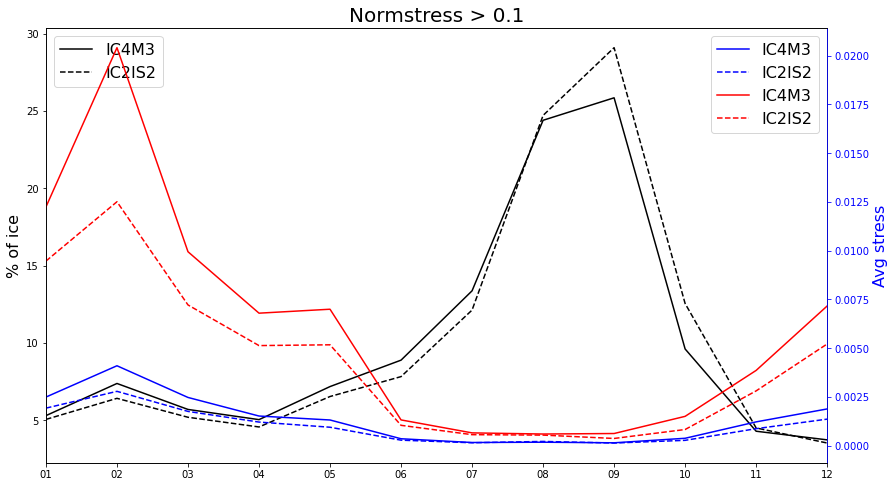

In [15]:
import numpy as np
def main():
    REP_coup1='/aos/home/bward/wim/post-proc/case83/avg/'
    REP_coup2='/aos/home/bward/wim/post-proc/case86/avg/'

    
    yyyy=2018
    list_month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    
    i=0
    j=1
    
    ts_normstr=[]
    ts_normstr2=[]
    ts_wrs=[]
    ts_wrs2=[]
    ts_wind=[]
    ts_wind2=[]
    ts_aice=[]
    ts_aice2=[]
    for mm in list_month:
        if i < 11:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy)+list_month[j]+'0100000.nc'
        else:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy+1)+list_month[0]+'0100000.nc'
        pathFile_coup=REP_coup1+nameFile
        pathFile_coup2=REP_coup2+nameFile
        dx_coup=xr.open_dataset(pathFile_coup)
        dx_coup2=xr.open_dataset(pathFile_coup2)
        
        aice=np.squeeze(dx_coup.aice)
        aice2=np.squeeze(dx_coup2.aice)
        lat=dx_coup.TLAT
        lon=dx_coup.TLON
        maskNH=aice.where(lat>=0)
        maskMIZ=aice.where(maskNH >=0.15)
#         maskMIZ=aice.where(maskNH>0)
        maskMIZ2=aice2.where(maskNH>0)
        
        dataX=dx_coup.strwvx
        dataY=dx_coup.strwvy
        strwv=np.sqrt(dataX**2+dataY**2)
        dataX=dx_coup.strairx
        dataY=dx_coup.strairy
        strair=np.sqrt(dataX**2+dataY**2)
        data=strwv.where(maskMIZ>0)/(strair.where(maskMIZ>0)+strwv.where(maskMIZ>0))
        wrs=strwv.where(data>0.1)
        temp_aice=aice.where(data>0.1)
        
        strwind=strair.where(data>0.1)
        
        pourc_MIZ=(data.where(data>=0.1).count().values/maskMIZ.count().values)*100
        
        dataX=dx_coup2.strwvx
        dataY=dx_coup2.strwvy
        strwv=np.sqrt(dataX**2+dataY**2)
        dataX=dx_coup2.strairx
        dataY=dx_coup2.strairy
        strair=np.sqrt(dataX**2+dataY**2)
        data=strwv.where(maskMIZ2>0)/(strair.where(maskMIZ2>0)+strwv.where(maskMIZ2>0))
        wrs2=strwv.where(data>0.1)
        temp_aice2=aice2.where(data>0.1)
        strwind2=strair.where(data>0.1)
        pourc_MIZ2=(data.where(data>=0.1).count().values/maskMIZ2.count().values)*100
        
#         fig, axes = plt.subplots(1,1,figsize=[14,14])
#         m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
#         m.drawcoastlines()
#         m.fillcontinents()
#         x, y = m(lon.values, lat.values)
#         sc = m.pcolor(x, y, np.squeeze(data.values)) #, norm=norm, cmap=cmap)
#         da_dyn=np.squeeze(dx_coup.aice-dx_noWRS.aice)
#         da_dyn2=np.squeeze(dx_test.aice-dx_test2.aice)
#         da_dyn_test=np.squeeze(dx_coup.aice-dx_noWRS.aice)
#         da_tot=np.squeeze(dx_coup.aice-dx_noCoup.aice)
#         da_therm=da_tot-da_dyn
#         da_tot2=np.squeeze(dx_test.aice-dx_noCoup.aice)
#         da_therm2=da_tot2-da_dyn2

        
    
    
    
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            ts_normstr.append(pourc_MIZ)
            ts_normstr2.append(pourc_MIZ2)
            ts_wrs.append(np.nanmean(np.nanmean(wrs, axis=0)))
            ts_wrs2.append(np.nanmean(np.nanmean(wrs2, axis=0)))
            ts_wind.append(np.nanmean(np.nanmean(strwind, axis=0)))
            ts_wind2.append(np.nanmean(np.nanmean(strwind2, axis=0)))
            ts_aice.append(np.nanmean(np.nanmean(temp_aice, axis=0))*100)
            ts_aice2.append(np.nanmean(np.nanmean(temp_aice2, axis=0))*100)
#             ts_dyn2.append(np.nanmean(np.nanmean(da_dyn2.where(maskMIZ>0), axis=0)))
#             ts_therm.append(np.nanmean(np.nanmean(da_therm.where(maskMIZ>0), axis=0)))
#             ts_tot.append(np.nanmean(np.nanmean(da_tot.where(maskMIZ>0), axis=0)))
#             ts_therm2.append(np.nanmean(np.nanmean(da_therm2.where(maskMIZ>0), axis=0)))
#             ts_tot2.append(np.nanmean(np.nanmean(da_tot2.where(maskMIZ>0), axis=0)))
    
        i=i+1
        j=j+1
        

# #     m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
    fig, axes = plt.subplots(1,1,figsize=[14,8])
    ax3=axes.twinx()
    ax3.plot(list_month, ts_wrs, 'b',label='IC4M3')
    ax3.plot(list_month, ts_wrs2, 'b', linestyle='--', label='IC2IS2')
    ax3.plot(list_month, ts_wind, 'r',label='IC4M3')
    ax3.plot(list_month, ts_wind2, 'r', linestyle='--', label='IC2IS2')
    ax3.legend(loc='upper right', prop={'size': 16})
    ax3.spines['right'].set_color('blue')
    ax3.set_ylabel("Avg stress", size=16)
    ax3.yaxis.label.set_color('blue')
    ax3.tick_params(axis='y', colors='blue')
    axes.plot(list_month, ts_normstr, 'k',label='IC4M3')
    axes.plot(list_month, ts_normstr2, 'k',label='IC2IS2', linestyle = '--')
#     axes.plot(list_month, ts_aice, 'm',label='IC4M3')
#     axes.plot(list_month, ts_aice2, 'm',label='IC2IS2', linestyle = '--')
    axes.legend(loc='upper left', prop={'size': 16})
    axes.set_ylabel("% of ice", size=16)
    axes.set_xlim([list_month[0],list_month[-1]])
    plt.title("Normstress > 0.1", fontsize=20)
    fig.savefig('ts_normStress.png', dpi='figure', format='png', metadata=None,bbox_inches='tight')
#Call main
if __name__ == "__main__":
    main()

/tmp/ipykernel_94166/3675560650.py:53: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc = m.pcolor(x, y, aice.where(maskNH>0))


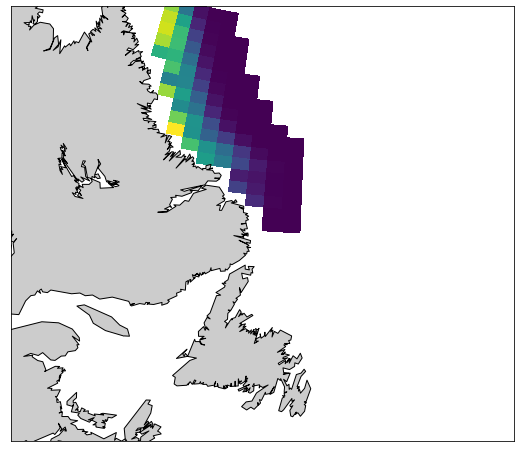

In [21]:
def main():
    REP_coup1='/aos/home/bward/wim/post-proc/case83/avg/'
    REP_coup2='/aos/home/bward/wim/post-proc/case86/avg/'

    
    yyyy=2018
    list_month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    
    i=0
    j=1
    
    ts_normstr=[]
    ts_normstr2=[]
    ts_wrs=[]
    ts_wrs2=[]
    ts_wind=[]
    ts_wind2=[]
    ts_aice=[]
    ts_aice2=[]
    
    for mm in list_month:
        if i < 11:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy)+list_month[j]+'0100000.nc'
        else:
            nameFile='iceh_avg.'+str(yyyy)+list_month[i]+'0100000-'+str(yyyy+1)+list_month[0]+'0100000.nc'
        pathFile_coup=REP_coup1+nameFile
        pathFile_coup2=REP_coup2+nameFile
        dx_coup=xr.open_dataset(pathFile_coup)
        dx_coup2=xr.open_dataset(pathFile_coup2)
        
        aice=np.squeeze(dx_coup.aice)
        aice2=np.squeeze(dx_coup2.aice)
        lat=dx_coup.TLAT
        lon=dx_coup.TLON
        maskNH=aice.where(lat>=48)
        maskNH=maskNH.where(lat<=60)
        maskNH=maskNH.where(lon>=298)
        maskNH=maskNH.where(lon<=316)
#         maskMIZ=aice.where(maskNH >=0.15)
#         maskMIZ=aice.where(maskNH <=0.8)
        
    m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',\
            lat_ts=50,lat_0=53,lon_0=-55.)
        
    fig, axes = plt.subplots(1,1,figsize=[14,8])

    plt.sca(axes)

    #Choose projection
    m.drawcoastlines()
    m.fillcontinents()
    x, y = m(lon.values, lat.values)
    sc = m.pcolor(x, y, aice.where(maskNH>0))
        
if __name__ == "__main__":
    main()

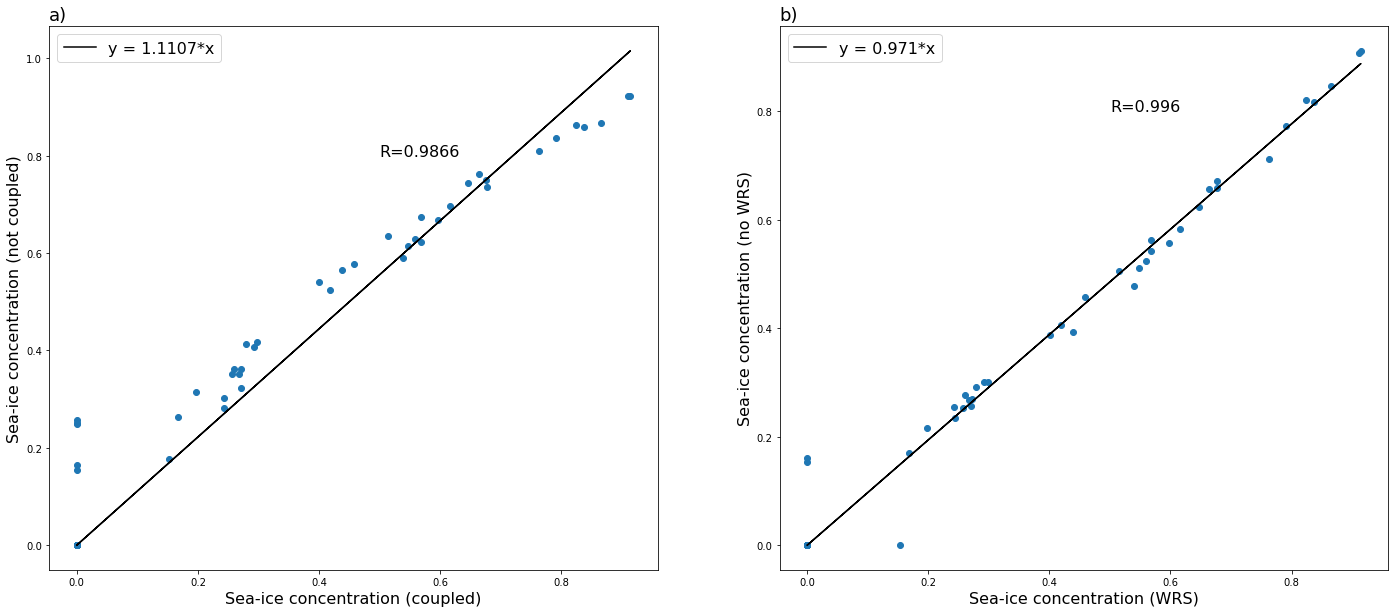

In [67]:
def main():
    REP_noWRS='/aos/home/bward/wim/post-proc/case84/avg/'
    REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
    REP_noCoup='/aos/home/bward/wim/post-proc/case85/avg/'
    
    yyyy=2018
    list_month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    
    i=0
    j=1
    
    fig, axes = plt.subplots(1,2,figsize=[24,10])
    nameFile='iceh_avg.'+str(yyyy)+'030100000-'+str(yyyy)+'040100000.nc'
    pathFile_coup=REP_coup+nameFile
    pathFile_noCoup=REP_noCoup+nameFile
    dx_coup = xr.open_dataset(pathFile_coup)
    dx_noCoup = xr.open_dataset(pathFile_noCoup)
        
    aice=np.squeeze(dx_coup.aice)
    lat=dx_coup.TLAT
    lon=dx_coup.TLON
    maskNH=aice.where(lat>=48)
    maskNH=maskNH.where(lat<=60)
    maskNH=maskNH.where(lon>=298)
    maskNH_coup=maskNH.where(lon<=316)
    
    aice_nocoup=np.squeeze(dx_noCoup.aice)
    lat=dx_coup.TLAT
    lon=dx_coup.TLON
    maskNH=aice_nocoup.where(lat>=48)
    maskNH=maskNH.where(lat<=60)
    maskNH=maskNH.where(lon>=298)
    maskNH_noCoup=maskNH.where(lon<=316)

    aice1=aice.where(maskNH_coup>0.15).values
    aice2=aice_nocoup.where(maskNH_noCoup>0.15).values
    
    aice1=aice1.reshape(aice1.shape[0]*aice1.shape[1])
    aice2=aice2.reshape(aice2.shape[0]*aice2.shape[1])
    aice1[np.isnan(aice1)] = 0
    aice2[np.isnan(aice2)] = 0
    fit_coefficients = np.polyfit(aice1, aice2, deg=1)
    correlation = np.corrcoef(aice1, aice2)[0,1]
    a=fit_coefficients[0]
    b=fit_coefficients[1]
    
    fit_to_potato=[]
    for x in aice1:
        fit_to_potato.append(a*x + b)

#     m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
# #     ax3=axes[0].twinx()
    axes[0].scatter(aice1, aice2)
    axes[0].plot(aice1, fit_to_potato, 'k', label = "y = "+str(round(a,4))+"*x")
# #     ax3.legend(loc='upper right', prop={'size': 16})
# #     ax3.spines['right'].set_color('blue')
# #     ax3.set_ylabel("da dyn", size=16)
# #     ax3.yaxis.label.set_color('blue')
# #     ax3.axhline(y = 0, color = 'b', linestyle = ':')
# #     ax3.tick_params(axis='y', colors='blue')
#     axes[0].plot(list_month, ts_tot, 'k',label='Tot IC4M3')
#     axes[0].plot(list_month, ts_therm, 'r',label='Therm IC4M3')
#     axes[0].plot(list_month, ts_tot2, 'k', linestyle = '--', label='Tot IC2IS2')
#     axes[0].plot(list_month, ts_therm2, 'r', linestyle = '--', label='Therm IS2IS2')
    axes[0].legend(loc='upper left', prop={'size': 16})
    axes[0].text(0.5, 0.8, "R="+str(round(correlation,4)), fontsize=16)
    axes[0].set_ylabel("Sea-ice concentration (not coupled)", size=16)
    axes[0].set_xlabel("Sea-ice concentration (coupled)", size=16)
#     axes[0].set_xlim([list_month[0],list_month[-1]])
#     axes[0].axhline(y = 0, color = 'k', linestyle = ':')
#     plt.title("Coupled - noCoupled MIZ (0.15 < aice < 0.8)", fontsize=20)

    REP_noWRS='/aos/home/bward/wim/post-proc/case84/avg/'
    REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
    REP_noCoup='/aos/home/bward/wim/post-proc/case84/avg/'
    
    yyyy=2018
    list_month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    
    i=0
    j=1
    
    nameFile='iceh_avg.'+str(yyyy)+'030100000-'+str(yyyy)+'040100000.nc'
    pathFile_coup=REP_coup+nameFile
    pathFile_noCoup=REP_noCoup+nameFile
    dx_coup = xr.open_dataset(pathFile_coup)
    dx_noCoup = xr.open_dataset(pathFile_noCoup)
        
    aice=np.squeeze(dx_coup.aice)
    lat=dx_coup.TLAT
    lon=dx_coup.TLON
    maskNH=aice.where(lat>=48)
    maskNH=maskNH.where(lat<=60)
    maskNH=maskNH.where(lon>=298)
    maskNH_coup=maskNH.where(lon<=316)
    
    aice_nocoup=np.squeeze(dx_noCoup.aice)
    lat=dx_coup.TLAT
    lon=dx_coup.TLON
    maskNH=aice_nocoup.where(lat>=48)
    maskNH=maskNH.where(lat<=60)
    maskNH=maskNH.where(lon>=298)
    maskNH_noCoup=maskNH.where(lon<=316)

    aice1=aice.where(maskNH_coup>0.15).values
    aice2=aice_nocoup.where(maskNH_noCoup>0.15).values
    
    aice1=aice1.reshape(aice1.shape[0]*aice1.shape[1])
    aice2=aice2.reshape(aice2.shape[0]*aice2.shape[1])
    aice1[np.isnan(aice1)] = 0
    aice2[np.isnan(aice2)] = 0
    fit_coefficients = np.polyfit(aice1, aice2, deg=1)
    correlation = np.corrcoef(aice1, aice2)[0,1]
    a=fit_coefficients[0]
    b=fit_coefficients[1]
    
    fit_to_potato=[]
    for x in aice1:
        fit_to_potato.append(a*x + b)

#     m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
# #     ax3=axes[0].twinx()
    axes[1].scatter(aice1, aice2)
    axes[1].plot(aice1, fit_to_potato, 'k', label = "y = "+str(round(a,4))+"*x")
# #     ax3.legend(loc='upper right', prop={'size': 16})
# #     ax3.spines['right'].set_color('blue')
# #     ax3.set_ylabel("da dyn", size=16)
# #     ax3.yaxis.label.set_color('blue')
# #     ax3.axhline(y = 0, color = 'b', linestyle = ':')
# #     ax3.tick_params(axis='y', colors='blue')
#     axes[0].plot(list_month, ts_tot, 'k',label='Tot IC4M3')
#     axes[0].plot(list_month, ts_therm, 'r',label='Therm IC4M3')
#     axes[0].plot(list_month, ts_tot2, 'k', linestyle = '--', label='Tot IC2IS2')
#     axes[0].plot(list_month, ts_therm2, 'r', linestyle = '--', label='Therm IS2IS2')
    axes[1].legend(loc='upper left', prop={'size': 16})
    axes[1].text(0.5, 0.8, "R="+str(round(correlation,4)), fontsize=16)
    axes[1].set_ylabel("Sea-ice concentration (no WRS)", size=16)
    axes[1].set_xlabel("Sea-ice concentration (WRS)", size=16)
    axes[0].set_title('a)', loc='left',  fontsize=18)
    axes[1].set_title('b)', loc='left',  fontsize=18)
    fig.savefig('correlation_therm_dyn.png', dpi='figure', format='png', metadata=None,bbox_inches='tight')
#     axes[0].set_xlim([list_month[0],list_month[-1]])
#     axes[0].axhline(y = 0, color = 'k', linestyle = ':')
#     plt.title("Coupled - noCoupled MIZ (0.15 < aice < 0.8)", fontsize=20)
    
# #Call main
if __name__ == "__main__":
    main()

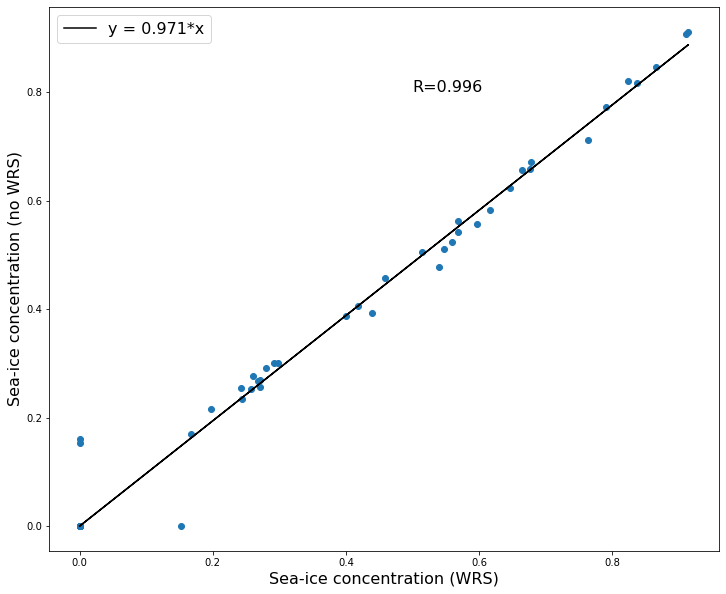

In [45]:
def main():
    REP_noWRS='/aos/home/bward/wim/post-proc/case84/avg/'
    REP_coup='/aos/home/bward/wim/post-proc/case83/avg/'
    REP_noCoup='/aos/home/bward/wim/post-proc/case84/avg/'
    
    yyyy=2018
    list_month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    
    i=0
    j=1
    
    fig, axes = plt.subplots(1,1,figsize=[12,10])
    nameFile='iceh_avg.'+str(yyyy)+'030100000-'+str(yyyy)+'040100000.nc'
    pathFile_coup=REP_coup+nameFile
    pathFile_noCoup=REP_noCoup+nameFile
    dx_coup = xr.open_dataset(pathFile_coup)
    dx_noCoup = xr.open_dataset(pathFile_noCoup)
        
    aice=np.squeeze(dx_coup.aice)
    lat=dx_coup.TLAT
    lon=dx_coup.TLON
    maskNH=aice.where(lat>=48)
    maskNH=maskNH.where(lat<=60)
    maskNH=maskNH.where(lon>=298)
    maskNH_coup=maskNH.where(lon<=316)
    
    aice_nocoup=np.squeeze(dx_noCoup.aice)
    lat=dx_coup.TLAT
    lon=dx_coup.TLON
    maskNH=aice_nocoup.where(lat>=48)
    maskNH=maskNH.where(lat<=60)
    maskNH=maskNH.where(lon>=298)
    maskNH_noCoup=maskNH.where(lon<=316)

    aice1=aice.where(maskNH_coup>0.15).values
    aice2=aice_nocoup.where(maskNH_noCoup>0.15).values
    
    aice1=aice1.reshape(aice1.shape[0]*aice1.shape[1])
    aice2=aice2.reshape(aice2.shape[0]*aice2.shape[1])
    aice1[np.isnan(aice1)] = 0
    aice2[np.isnan(aice2)] = 0
    fit_coefficients = np.polyfit(aice1, aice2, deg=1)
    correlation = np.corrcoef(aice1, aice2)[0,1]
    a=fit_coefficients[0]
    b=fit_coefficients[1]
    
    fit_to_potato=[]
    for x in aice1:
        fit_to_potato.append(a*x + b)

#     m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
# #     ax3=axes[0].twinx()
    axes.scatter(aice1, aice2)
    axes.plot(aice1, fit_to_potato, 'k', label = "y = "+str(round(a,4))+"*x")
# #     ax3.legend(loc='upper right', prop={'size': 16})
# #     ax3.spines['right'].set_color('blue')
# #     ax3.set_ylabel("da dyn", size=16)
# #     ax3.yaxis.label.set_color('blue')
# #     ax3.axhline(y = 0, color = 'b', linestyle = ':')
# #     ax3.tick_params(axis='y', colors='blue')
#     axes[0].plot(list_month, ts_tot, 'k',label='Tot IC4M3')
#     axes[0].plot(list_month, ts_therm, 'r',label='Therm IC4M3')
#     axes[0].plot(list_month, ts_tot2, 'k', linestyle = '--', label='Tot IC2IS2')
#     axes[0].plot(list_month, ts_therm2, 'r', linestyle = '--', label='Therm IS2IS2')
    axes.legend(loc='upper left', prop={'size': 16})
    axes.text(0.5, 0.8, "R="+str(round(correlation,4)), fontsize=16)
    axes.set_ylabel("Sea-ice concentration (no WRS)", size=16)
    axes.set_xlabel("Sea-ice concentration (WRS)", size=16)
    fig.savefig('correlation_WRS_noWRS.png', dpi='figure', format='png', metadata=None,bbox_inches='tight')
#     axes[0].set_xlim([list_month[0],list_month[-1]])
#     axes[0].axhline(y = 0, color = 'k', linestyle = ':')
#     plt.title("Coupled - noCoupled MIZ (0.15 < aice < 0.8)", fontsize=20)
    
# #Call main
if __name__ == "__main__":
    main()